# Machine Learning and Data Preparation CA 2

### Student Name: Eduardo Cohen

### Student Number: 22315

## Introduction

**We are presented with a dataset from the Online Retailer Ebay with information about the bids from the customers to find the real price of the product based on the market demand. By using data cleaning and preparation, data analysis techniques to be used through the best machine learning model we can find, our goal is to predict the future bids of the customers.**

# EDA (Exploratory Data Analysis)

In [576]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats
import math

#visualisation
import seaborn as sns 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
#import mglearn
import matplotlib as mpl
%matplotlib inline 
#plots are shown inline with cell
plt.style.use('ggplot') #style like R studio
mpl.rcParams['axes.unicode_minus'] = False 
#use hyphen in axis
sns.set(color_codes=True)

#preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing

#Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split, cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_predict, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [227]:
# Import this library to suppress the warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [175]:
bidding_df = pd.read_csv("dataset/shill_bidding_dataset.csv")

## Overview of the dataset

The dataset used for this project was publically available on the UCI Machine Learning Repository (Center for the Machine Learning and Intelligent Systems). This dataset is originally sourced from:<br>
Sources: <br>
https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset <br>
'Alzahrani, Ahmad and Sadaoui, Samira (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Regina, SK, Canada: Department of Computer Science, University of Regina.

Information about the Metadata: \
<span class="mark">"Class": 0 for normal behaviour bidding; 1 for otherwise. - target variable</span> <br><br>
All dependent features: <br>
"Record ID": Unique identifier of a record in the dataset. \
"Auction ID": Unique identifier of an auction. \
"Bidder ID": Unique identifier of a bidder. \
"Bidder Tendency": A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice. \
"Bidding Ratio": A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants. \
"Successive Outbidding": A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments. \
"Last Bidding": A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction. \
"Auction Bids": Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions. \
"Auction Starting Price": a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.\
"Early Bidding": A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users. \
"Winning Ratio": A shill bidder competes in many auctions but hardly wins any auctions. \
"Auction Duration": How long an auction lasted.

#### Reviewing the ten first rows of the dataset

In [94]:
bidding_df.head(10)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,...,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,...,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,...,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,...,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,...,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,...,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,...,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,...,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,...,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,...,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,...,0.993593,0.413788,0.611111,7,1


In [7]:
print('Number of observations in the dataset:', bidding_df.shape[0])
print('Number of features in the dataset:', bidding_df.shape[1])

Number of observations in the dataset: 6321
Number of features in the dataset: 13


In [8]:
print("Number of duplicate rows:", bidding_df.duplicated().sum())

Number of duplicate rows: 0


In [9]:
#to visualise all columns easier
pd.set_option("display.max_column", 10)
pd.set_option("display.max_row", 150)

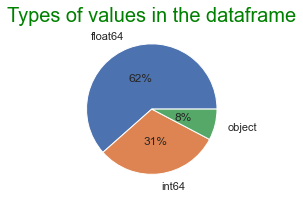

In [10]:
bidding_df.dtypes.value_counts().plot(kind='pie', 
                                    autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,
                                    figsize=(3,3))

plt.title(label="Types of values in the dataframe",fontsize=20, color="green")
plt.ylabel('')
plt.show()

In [95]:
bidding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


**After we made a first preview of the dataset we can state there are no duplicate rows in the dataset. The data type for most features is float, as many features have decimal values. The feature "Bidder ID" is an object type as it has text values. We will convert the numerical observations that are float into integers. The integers use less memory for processing, specifically integers of 32 bits use 50% less of memory. As Serpa (2020) states**
"***Ints can be as small as 1 byte, using only 12.5% percent as much memory..." "...besides the memory savings, using smaller types is often faster as well.***"
**. Consequently, these values will be better fitted for improving the performance of the machine learning model and provide us results faster.**

## Missing values and Date type conversions

### Finding missing values

In [12]:
print("Percentage of missing values:", (bidding_df.isna().sum().sum()/bidding_df.shape[0]))

Percentage of missing values: 0.0


**We will review the unique values in the whole dataset and see if we can identify any missing ones.**

In [13]:
for col in bidding_df:
    print(f'{col:-<25} {bidding_df[col].unique()}')

Record_ID---------------- [    1     2     3 ... 15138 15139 15144]
Auction_ID--------------- [ 732  900 2370  600 2172 1370 2236  181  432 1968  522 1847  547  143
 2419 2076 2165  461  368 1165  979 1269 2086  550  818 1001  352  995
  438  870  738 1349 1045 1892  838 1943 1661  807 2079   25 1644  556
 1392 1577 1610 1141  166  651 1083  783 1185  715 1264 2534  496 1541
 2273 1582  276 1273  871 1012 1473  378 1314 1548  572  354  514 1135
 2020 1367 2122  582  733  431  427 1694 1962   39  539  944  240 2381
  506 1342 1628 2387  332 1668 1316 2516  171  603 1439 1323 2257 1355
 1530 1818  631  916   65   97  348 1418 1175 1126  476  189 1829 1513
  577 1013  255 1745  459  224 1896  105  192 1009 2060 2507 1214  544
 2116  571   71   42  605  210 1207  953  664  787 1591 1664  655  998
  533 1186  314 1852  482  104 2415 2394   43 2529 1476 1026  125 2110
 1310 1378 1088   52 1681  981 1939 1975 1614 2343 1368  766 1619  100
 2021 1232  521 2434 2266  650 2408  443 2447 2397  45

**As we could predict there are many features with observations with decimals values that we could identify and we need round them to help with the data type conversion to integer. We would help reduce the data noise, facilitating the process of mathematical calculations and improving the model performance.** **As Senavirathne, N., Torra, V. (2019) states** 
"***In many cases, rounding improves the model utility as it reduces the noise in the data so that the ML algorithm can learn without the risk of over-fitting.***"

In [176]:
bidding_df[["Bidder_Tendency", "Successive_Outbidding","Last_Bidding","Starting_Price_Average","Early_Bidding"]] = bidding_df[["Bidder_Tendency", "Successive_Outbidding","Last_Bidding","Starting_Price_Average","Early_Bidding"]].round(2)

**The Ratios features we consider them as to be represented in percetange. So we apply the mathematical calculation multiplying by 100 to move the decimals 4 positions and reach the desired value for the correct representation.**

In [177]:
bidding_df[["Bidding_Ratio", "Winning_Ratio"]] = bidding_df[["Bidding_Ratio", "Winning_Ratio"]]*100

**Checking if the rounded has worked in one of the features:**

In [179]:
bidding_df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,...,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.20,40.000000,...,0.99,0.00,66.666667,5,0
1,2,732,g***r,0.02,20.000000,...,0.99,0.01,94.444444,5,0
2,3,732,t***p,0.14,20.000000,...,0.99,0.00,100.000000,5,0
3,4,732,7***n,0.10,20.000000,...,0.99,0.10,100.000000,5,0
4,5,900,z***z,0.05,22.222222,...,0.00,0.00,50.000000,7,0


In [178]:
print(bidding_df["Bidder_Tendency"].unique())

[0.2  0.02 0.14 0.1  0.05 0.04 0.4  0.12 0.16 0.6  0.5  0.01 0.03 0.17
 0.25 0.11 1.   0.07 0.22 0.57 0.21 0.48 0.06 0.08 0.18 0.   0.75 0.33
 0.09 0.27 0.47 0.45 0.8  0.42 0.15 0.24 0.13 0.19 0.88 0.36 0.58 0.29
 0.44 0.52 0.32 0.71 0.69 0.23 0.43 0.67 0.35 0.38 0.31 0.26 0.3  0.56
 0.55 0.83 0.95 0.34 0.62 0.46 0.54 0.28 0.78 0.73 0.7  0.41 0.92 0.91
 0.93 0.68 0.9  0.84 0.72 0.81 0.89 0.39 0.86 0.77 0.64 0.53 0.59 0.94
 0.85 0.65 0.87]


**Except for the Bidder ID that is text and the features Record_ID, Auction_ID, Auction_Duration and Class are already integers as there are already whole numbers that are ready to be processed by the machine learning model.**

In [180]:
bidding_df[["Bidder_Tendency", "Bidding_Ratio", "Successive_Outbidding","Last_Bidding","Auction_Bids","Starting_Price_Average","Early_Bidding","Winning_Ratio", "Record_ID", "Auction_ID", "Auction_Duration", "Class"]] = bidding_df[["Bidder_Tendency", "Bidding_Ratio", "Successive_Outbidding","Last_Bidding","Auction_Bids","Starting_Price_Average","Early_Bidding","Winning_Ratio", "Record_ID", "Auction_ID", "Auction_Duration", "Class"]].astype(int)

**To use most of the data to predict the bids, we will remove any feature that can not be converted to a number. As the Bidder ID is a text type of data and does not represent relevant information to be used in the model prediction we will dispose of it.**

In [115]:
print(bidding_df["Bidder_ID"].values)

['_***i' 'g***r' 't***p' ... 'h***t' 'd***d' 'a***l']


In [183]:
bidding_df.drop("Bidder_ID", axis=1, inplace=True)

In [181]:
bidding_df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,...,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0,40,...,0,0,66,5,0
1,2,732,g***r,0,20,...,0,0,94,5,0
2,3,732,t***p,0,20,...,0,0,100,5,0
3,4,732,7***n,0,20,...,0,0,100,5,0
4,5,900,z***z,0,22,...,0,0,50,7,0


**New feature types**

In [184]:
bidding_df.dtypes

Record_ID                 int32
Auction_ID                int32
Bidder_Tendency           int32
Bidding_Ratio             int32
Successive_Outbidding     int32
Last_Bidding              int32
Auction_Bids              int32
Starting_Price_Average    int32
Early_Bidding             int32
Winning_Ratio             int32
Auction_Duration          int32
Class                     int32
dtype: object

# Visualisation

## Target variable

**Defining the target variable as the Class feature to use later in the machine learning model.**

In [164]:
target= bidding_df.iloc[: , [11]].copy() 
target.head(10)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


**Checking the balance of the dataset on the Class Feature.**

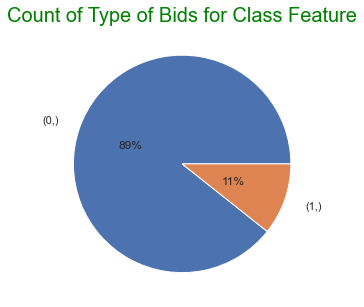

In [43]:
target.value_counts().plot(kind='pie', 
            autopct='%1.0f%%', pctdistance=0.5, 
            labeldistance=1.2,figsize=(8,5))

plt.title(label="Count of Type of Bids for Class Feature",fontsize=20, color="green")
plt.ylabel('')
plt.show()

**By this graph, we can observe the normal bids (89%) are more represented than the anomalous bids (11%). The main goal of our machine learning is to predict normal bids, so we can work with the feature and use it later on the model as it is now. If we had more anomalous bids rather than normal ones we should consider applying data engineering specifically to try to correct it.**

In [58]:
target["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

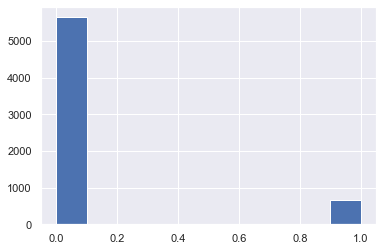

In [45]:
plt.hist(target)
plt.show() 

In [52]:
print(f'Count of unique values for the target:',target["Class"].nunique())

Count of unique values for the target: 2


**The number of normal bids is 5646 (represented by the value 0) and the anomalous bids are 675 (represented by the value 1). Considering the values are set in two categories for these two types of bids we will choose a categorial Machine Learning model later.**

## Independent variables 

In [169]:
#bidding2_df = bidding_df[["Bidder_Tendency", "Bidding_Ratio", "Successive_Outbidding","Last_Bidding","Auction_Bids","Starting_Price_Average","Early_Bidding","Winning_Ratio", "Record_ID", "Auction_ID", "Auction_Duration"]]
print( f'The dataset only with the Indepedent Variables:\n')
bidding_df.head()

The dataset only with the Indepedent Variables:



,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,...,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,0,0,0,...,0,0,0,5,0
1,2,732,0,0,0,...,0,0,0,5,0
2,3,732,0,0,0,...,0,0,1,5,0
3,4,732,0,0,0,...,0,0,1,5,0
4,5,900,0,0,0,...,0,0,0,7,0


**Reviewing the correlation between all features to find more insights on the dataset.**

In [185]:
df_corr1 = bidding_df.corr()
df_corr1

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,...,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.006621,-0.040376,0.006782,...,-0.023879,0.007418,-0.057115,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.003907,-0.021493,0.004104,...,-0.049242,0.028295,-0.039804,0.024918,-0.007985
Bidder_Tendency,0.006621,-0.003907,1.000000,0.057335,0.034407,...,0.020300,-0.014833,0.049818,0.001553,0.040292
Bidding_Ratio,-0.040376,-0.021493,0.057335,1.000000,0.536543,...,-0.077075,-0.062092,0.644195,-0.019230,0.568273
Successive_Outbidding,0.006782,0.004104,0.034407,0.536543,1.000000,...,0.008508,-0.029075,0.311044,0.004533,0.783573
Last_Bidding,0.008565,0.027039,-0.016880,-0.034361,-0.007553,...,0.052431,0.933744,-0.046320,0.032259,-0.008701
Auction_Bids,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Starting_Price_Average,-0.023879,-0.049242,0.020300,-0.077075,0.008508,...,1.000000,0.045923,-0.084439,0.031152,0.010771
Early_Bidding,0.007418,0.028295,-0.014833,-0.062092,-0.029075,...,0.045923,1.000000,-0.063456,0.030069,-0.031382
Winning_Ratio,-0.057115,-0.039804,0.049818,0.644195,0.311044,...,-0.084439,-0.063456,1.000000,-0.023940,0.393955


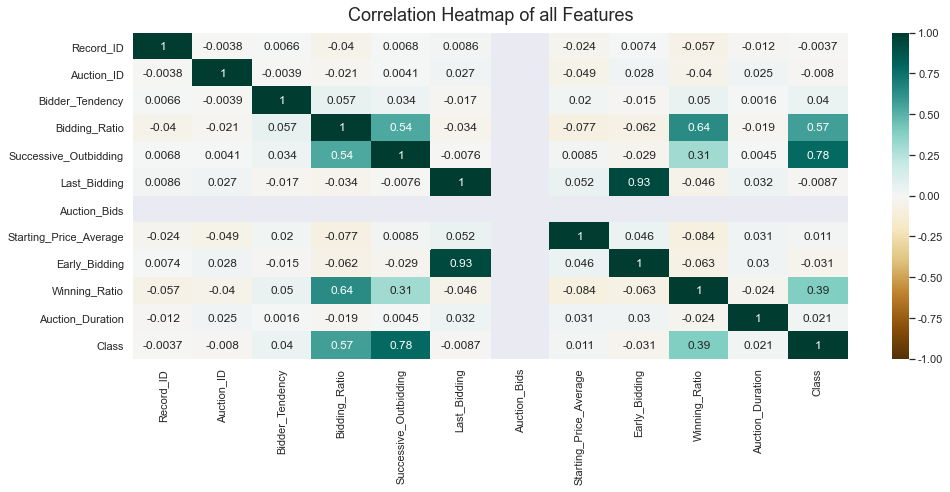

In [186]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr1 , vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of all Features', fontdict={'fontsize':18}, pad=12);

**We can identify that Successive Outbidding is the feature with more correlation with the Class feature (0.78 correlation). The Successive Outbidding represents the winner's bidders that are bidding to increase the price of the goods with a small amount of increase. By doing this they guarantee there are no other bidders' competitors. Additionally, we can state this feature is the most impactful towards the target feature (Class feature) in the dataset compared to the other correlation values. Probably it is one of the key features for the prediction performance of the machine learning model.**

In [154]:
#representation of the values in percentage
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

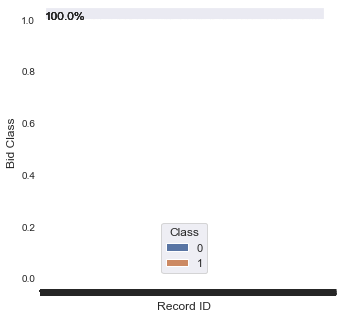

In [165]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="Record_ID", hue="Class", data= bidding_df)
plt.xticks(size=10)
plt.xlabel("Record ID", size=12)
plt.yticks(size=10)
plt.ylabel("Bid Class", size=12)

with_hue(ax, bidding_df["Record_ID"], 2, 2)

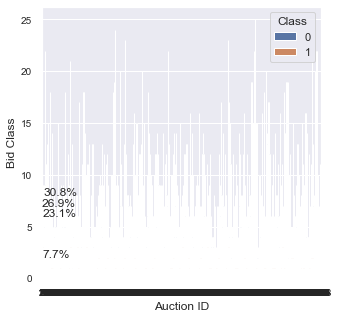

In [167]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="Auction_ID", hue="Class", data= bidding_df)
plt.xticks(size=10)
plt.xlabel("Auction ID", size=12)
plt.yticks(size=10)
plt.ylabel("Bid Class", size=12)

with_hue(ax, bidding_df["Auction_ID"], 2, 2)

**The Record ID and Auction ID are the features with less correlation with the Class feature as we can observe in the graphs. As they are only identifiers of information that is not relevant to the machine learning model we should remove it. For the Auction Bids the is no correlation with any of the other features, so applying the same data removal would be the best option to help with the machine learning accuracy and avoid any data that could interfere with the results of the future predictions, such as creating data noise for example.**

In [188]:
bidding_df.drop(["Record_ID","Auction_Bids","Auction_ID"], axis=1, inplace=True)

In [189]:
bidding_df.head(10)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0,40,0,0,0,0,66,5,0
1,0,20,0,0,0,0,94,5,0
2,0,20,0,0,0,0,100,5,0
3,0,20,0,0,0,0,100,5,0
4,0,22,0,0,0,0,50,7,0
5,0,11,0,0,0,0,80,7,0
6,0,22,0,0,0,0,75,7,0
7,0,44,1,0,0,0,100,7,1
8,0,18,1,0,0,0,94,7,1
9,0,34,0,0,0,0,61,7,1


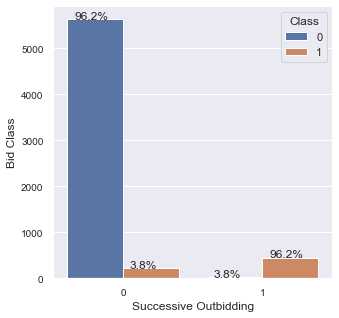

In [153]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="Successive_Outbidding", hue="Class", data= bidding_df)
plt.xticks(size=10)
plt.xlabel("Successive Outbidding", size=12)
plt.yticks(size=10)
plt.ylabel("Bid Class", size=12)

with_hue(ax, bidding_df["Successive_Outbidding"], 2, 2)

In [151]:
bidding_df["Successive_Outbidding"].value_counts()

0    5852
1     469
Name: Successive_Outbidding, dtype: int64

**We can visualise on the graph the Successive Outbidding feature is showing most of the values as 0 (96.2%) in correlation as well with the Bid Class denoting a normal bidding behaviour (represented by a total of 5852 bidders). Meaning there are more bidders that have not tried to win the bid by increasing the bid price to have an advantage over their other bidder's competitors. These preliminary results will help to predict the normal biddings on the machine learning model too.**

# Data scaling

In [190]:
for col in bidding_df:
    print(f'{col:-<25} {bidding_df[col].unique()}')

Bidder_Tendency---------- [0 1]
Bidding_Ratio------------ [ 40  20  22  11  44  18  34  56  10   5   4   3  14  71  15  60   8   9
  16  37  66  12   2  23  26  13   1  30   7  21   6  29  28  31  25  33
  27  17  35  62  41  77  80  42  52  24  46  57  83  50  19  58  38  39
 100  70  76  55  32  36  75  54  81  53  78  48  72  64  45  85  74  47
  61  63  43  51  87  68  73  96  79  88  82]
Successive_Outbidding---- [0 1]
Last_Bidding------------- [0 1]
Starting_Price_Average--- [0 1]
Early_Bidding------------ [0 1]
Winning_Ratio------------ [ 66  94 100  50  80  75  61  60   0  81  93  84  79  72  83  90  77  70
  86  87  73  85  82  76  78  88  92  91  95  89  33  62  63  71  64  55
  97  57  40]
Auction_Duration--------- [ 5  7  1  3 10]
Class-------------------- [0 1]


**We can identify from the Bidding Ratio and Winning Ratio there are some high values. For the feature scaling the concept is to keep most of the feature within similar range of values, in this way we could avoid creating more processing power for the machine learning model. So applying scaling should be a good option to normalise the data.** **As Kumar (2022) states** 
"***This ensures that no single feature dominates the others, and makes training and tuning quicker and more effective.***" "***Machine learning algorithms using optimizing or learning algorithms such as gradient descent require more steps to converge with larger magnitudes as the curvature of the loss function increases. The reason is that the derivatives of features with larger relative magnitudes will tend to be larger as well.***"

In [191]:
print(f'new statistical analysis:\n',
      bidding_df["Bidding_Ratio"].describe())

new statistical analysis:
 count    6321.000000
mean       12.371302
std        13.191647
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       100.000000
Name: Bidding_Ratio, dtype: float64


In [193]:
print(f'new statistical analysis:\n',
      bidding_df["Winning_Ratio"].describe())

new statistical analysis:
 count    6321.000000
mean       36.643411
std        43.520213
min         0.000000
25%         0.000000
50%         0.000000
75%        85.000000
max       100.000000
Name: Winning_Ratio, dtype: float64


**The statistical analysis shows that the high values are around the number 100 for both features.**

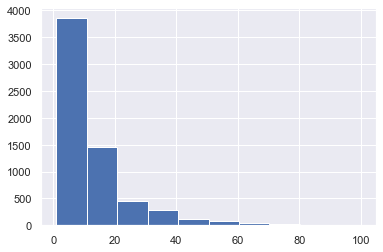

<AxesSubplot:xlabel='Bidding_Ratio'>

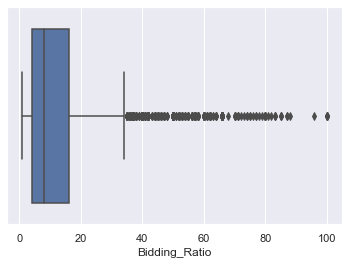

In [201]:
plt.hist(bidding_df["Bidding_Ratio"])
plt.show()
sns.boxplot(x=bidding_df["Bidding_Ratio"])

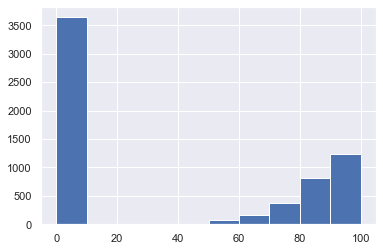

In [194]:
plt.hist(bidding_df["Winning_Ratio"])
plt.show()

<AxesSubplot:xlabel='Winning_Ratio'>

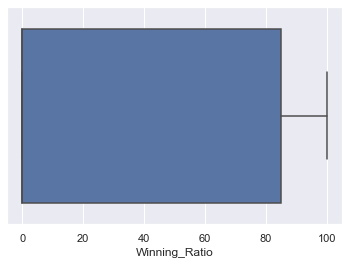

In [202]:
sns.boxplot(x=bidding_df["Winning_Ratio"])

**For both features we can identify by the boxplot graph there are some outliers. Let's try to calculate the boundaries of those outliers.**

In [203]:
print("skewness of Winning Ratio distribution:", round(bidding_df["Winning_Ratio"].skew(), 2))

skewness of Winning Ratio distribution: 0.41


In [204]:
#compute the IQR to calculate the bounderies
iqr1 = bidding_df["Winning_Ratio"].quantile(0.75)-bidding_df["Winning_Ratio"].quantile(0.25)
print('the Winning Ratio IQR is:', iqr1)

iqr2 = bidding_df["Bidding_Ratio"].quantile(0.75)-bidding_df["Bidding_Ratio"].quantile(0.25)
print('the Bidding Ratio IQR is:', iqr2)

the Winning Ratio IQR is: 85.0
the Bidding Ratio IQR is: 12.0


In [207]:
# outliers
lower_bridge1 = bidding_df["Winning_Ratio"].quantile(0.25)+(iqr1*1.5)
upper_bridge1 = bidding_df["Winning_Ratio"].quantile(0.75)+(iqr1*1.5)
print('Threshold for the Winning Ratio outliers, lower bridge', lower_bridge1, 'and upper bridge', upper_bridge1)

lower_bridge2 = bidding_df["Bidding_Ratio"].quantile(0.25)+(iqr2*1.5)
upper_bridge2 = bidding_df["Bidding_Ratio"].quantile(0.75)+(iqr2*1.5)
print('Threshold for the Bidding Ratio outliers, lower bridge', lower_bridge2, 'and upper bridge', upper_bridge2)

Threshold for the Winning Ratio outliers, lower bridge 127.5 and upper bridge 212.5
Threshold for the Bidding Ratio outliers, lower bridge 22.0 and upper bridge 34.0


In [221]:
# extreme outliers
ex_lower_bridge1 = bidding_df["Winning_Ratio"].quantile(0.25)+(iqr1*3)
ex_upper_bridge1 = bidding_df["Winning_Ratio"].quantile(0.75)+(iqr1*3)
print('Threshold for the Winning Ratio extreme outliers, lower bridge', ex_lower_bridge1, 'and upper bridge', ex_upper_bridge1)

ex_lower_bridge2 = bidding_df["Bidding_Ratio"].quantile(0.25)+(iqr2*3)
ex_upper_bridge2 = bidding_df["Bidding_Ratio"].quantile(0.75)+(iqr2*3)
print('Threshold for the Bidding Ratio extreme outliers, lower bridge', ex_lower_bridge2, 'and upper bridge', ex_upper_bridge2)

Threshold for the Winning Ratio extreme outliers, lower bridge 255.0 and upper bridge 340.0
Threshold for the Bidding Ratio extreme outliers, lower bridge 40.0 and upper bridge 52.0


In [219]:
print(f'Percentage of outliers in Winning Ratio feature:', 
      int((sum(i > 127.5 for i in bidding_df["Winning_Ratio"])/bidding_df["Winning_Ratio"].shape[0])*100),'%')

print(f'Percentage of outliers in Bidding Ratio feature:', 
      int((sum(i > 22 for i in bidding_df["Bidding_Ratio"])/bidding_df["Bidding_Ratio"].shape[0])*100),'%')

Percentage of outliers in Winning Ratio feature: 0 %
Percentage of outliers in Bidding Ratio feature: 14 %


In [222]:
print(f'Percentage of extreme outliers in Winning Ratio feature:', 
      int((sum(i > 255 for i in bidding_df["Winning_Ratio"])/bidding_df["Winning_Ratio"].shape[0])*100),'%')

print(f'Percentage of extreme outliers in Bidding Ratio feature:', 
      int((sum(i > 40 for i in bidding_df["Bidding_Ratio"])/bidding_df["Bidding_Ratio"].shape[0])*100),'%')

Percentage of extreme outliers in Winning Ratio feature: 0 %
Percentage of extreme outliers in Bidding Ratio feature: 4 %


**After investigating the outliers on both features we can understand the percentage of them is considerably low and it does not represent an impact on the overall values of the feature.**

# Feature reduction

**Reviewing the dataset before PCA**

In [228]:
for col in bidding_df:
    print(f'{col:-<25} {bidding_df[col].unique()}')

Bidder_Tendency---------- [0 1]
Bidding_Ratio------------ [ 40  20  22  11  44  18  34  56  10   5   4   3  14  71  15  60   8   9
  16  37  66  12   2  23  26  13   1  30   7  21   6  29  28  31  25  33
  27  17  35  62  41  77  80  42  52  24  46  57  83  50  19  58  38  39
 100  70  76  55  32  36  75  54  81  53  78  48  72  64  45  85  74  47
  61  63  43  51  87  68  73  96  79  88  82]
Successive_Outbidding---- [0 1]
Last_Bidding------------- [0 1]
Starting_Price_Average--- [0 1]
Early_Bidding------------ [0 1]
Winning_Ratio------------ [ 66  94 100  50  80  75  61  60   0  81  93  84  79  72  83  90  77  70
  86  87  73  85  82  76  78  88  92  91  95  89  33  62  63  71  64  55
  97  57  40]
Auction_Duration--------- [ 5  7  1  3 10]
Class-------------------- [0 1]


## PCA

**PCA (Principal Component Analysis) is essentially an algorithm to reduce the dimensionality or reduction of data. As Francesco Palumbo et al (2008, p.356) add as well** "***They use PCA as a technique for describing a dataset without imposing any assumption about distribution or without starting from an underlying statistical model***" **(Note: et al. means ‘and others’).** \
**It is a good method to use when as analysts we are not able to clearly identify variables for remotion on the dataset.**\
**The benefits of using PCA, in addition to feature reduction, it helps to improve the efficiency of machine learning models and in most cases reduces the unnecessary data or data that can not be interpreted by the machines.** **As Arbel ("n.d." note: stands for no date) mentions in his article** "***PCA can help us improve performance at a very low cost of model accuracy. Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data.***"

In [ ]:
target = bidding_df['Class']
bidding_df.drop(columns='Class', axis=1, inplace=True)

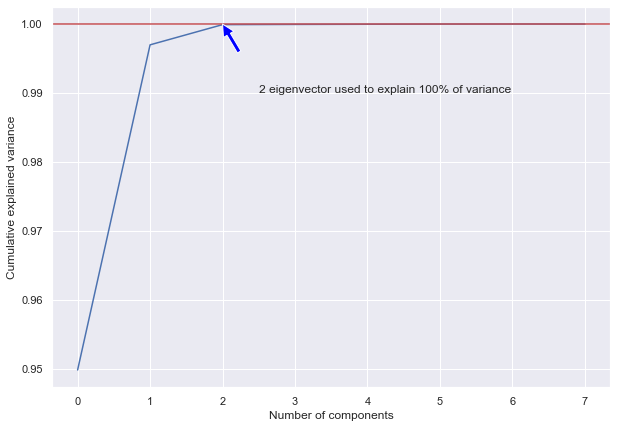

In [292]:
# Plotting the Data
pca = PCA().fit(bidding_df)
plt.figure(1, figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance'); 

#Plotting line with 100% e.v.
plt.axhline(y=1, color='r', linestyle='-')

#adding an arrow and annotations
arrowprops=dict(facecolor='blue', shrink=0.5)
an = plt.annotate("2 eigenvector used to explain 100% of variance", 
                  xy=(2, 1), xytext=(2.5, 0.99), arrowprops=arrowprops)
plt.show()

In [287]:
#95% of variance
pca = PCA(n_components =2, random_state=42)
pca_df = pca.fit_transform(bidding_df)

v_exp = pca.explained_variance_ratio_.cumsum()
v_ratio = pca.explained_variance_ratio_.sum()
print(v_exp, v_ratio, v_exp.shape)

[0.94979342 0.99698073] 0.996980729265216 (2,)


**After reducing the components to 2 and calculating the cumulative sum of the variance we can observe we have reached the desired variance of 100%.**

In [288]:
print ("Dataset shape after applying PCA", pca_df.shape)

Dataset shape after applying PCA (6321, 2)


In [289]:
bidding_pca = pd.DataFrame(pca_df, columns =['Component1', 'Component2'])

bidding_pca.head()

,Component1,Component2
0,34.324688,21.137128
1,57.715776,-4.097768
2,63.592473,-5.307883
3,63.592473,-5.307883
4,15.020657,6.733121


<AxesSubplot:title={'center':'PCA components distribution'}>

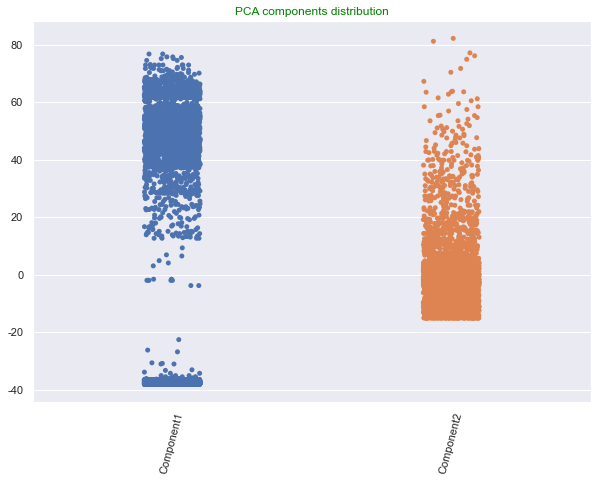

In [291]:
plt.xticks(rotation=75)
plt.title('PCA components distribution', color='green')
sns.set(rc={'figure.figsize':(7,7)})
sns.stripplot(data=bidding_pca)

**By the graph above we can observe the two features have a normal distribution between higher and lower values that would help in more balanced model predictions and not inclining the results to one side more than the other or having the possibility of biased results.**

**By reducing the number of features with PCA we would further help the machine learning algorithms to have a better interpretation of the data, filtering the features with the most relevance on the dataset, having less misclassification of the data, improving the accuracy of the model and reaching to better model predictions for classification on unseen data examples.** \
**As Arbel ("n.d." note: stands for no date) adds in his example of the benefits from using PCA** "***...demonstrates an improvement to the accuracy of the tree classifier C4.5 using PCA. Running an experiment on a medical dataset from UCI Machine Learning repository, the authors we able to improve model accuracy from 86% to 91% while precision dramatically improved from 33% to 100%.***"

## LDA

**Linear discriminant analysis (LDA) is a linear dimensionality reduction. It uses class labels to reduce the data dimension by increasing each of the classes' separation in two. Once the model has learned about the dataset it can predict the class label of new data points. It is one of the most optimal machine learning algorithms when we are working with classification datasets.**  \
**As Kumar (2022) mentions in his article** "***Linear Discriminant Analysis (LDA) is a powerful algorithm that can be used to determine the best separation between two or more classes. With LDA, you can quickly and easily identify which class a particular data point belongs to.***" \
**As per the benefits of using LDA we can mention: finding the most important features on the dataset, reductions of the features and it is not subject to the “curse of dimensionality”, that means the volume of the data it is not affected by the dimentionality to obtain the machine learning model results and reduce the computing of information from the model too.** \
**Sunil Kumar Dash (2021) adds in his article about LDA** "***LDA can also be used in data preprocessing to reduce the number of features just as PCA which reduces the computing cost significantly. LDA is also used in face detection algorithms. In Fisherfaces LDA is used to extract useful data from different faces. Coupled with eigenfaces it produces effective results.***"

In [338]:
#Define dependable and independent variable
X1 = bidding_df
y1 = target

#Fit the LDA model
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X1, y1)

Text(0, 0.5, 'Component 2')

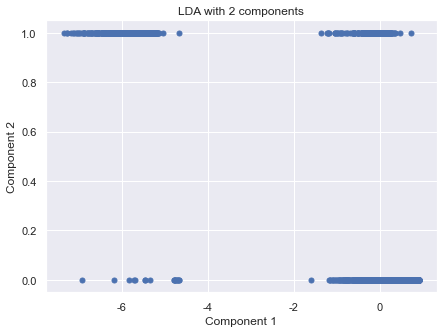

In [349]:
#Making a scatterplot using the data stored in the X_lda variable
plt.figure(figsize=[7, 5])

plt.scatter(X_lda, y1, s=25, cmap='plasma')
plt.title('LDA with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

**LDA algorithm has a better performance for multi-class classification when we have a categorical output variable as in our target variable. It will probably gather better predictions on the model for the results between normal and anomalous biddings. It is the most simplest yet powerful algorithm we can choose, so this should be our best option for data reduction.**

# Machine learning

**As our independent variable is related to the two types of biddings normal and anomalous. Our model should be able to identify which one corresponds depending on the data. So we should be using a classification model in supervised learning.** \
**Supervised learning is defined by the use of labelled datasets and labelled input and output data. With this approach, the algorithm learns by making predictions on the new data and adjusting to reach the best results. For our dataset, this aspect will help to predict the labelled data of biddings and define them between normal and anomalous.** \
**We will choose two classification machine learning models: K-Nearest Neighbors (KNN) and Logistic Regression.** \
**The Logistic Regression model is commonly used for binary classification cases and when we have two types of classes. It is one of the simplest classification models and it is based on a predictor for variables outcomes as 0 and 1 (as we have in our dataset). The probability of the model is determined by the combination of the predictor variables.** \
**The KNN model obtains the data points that are nearest in distance to the original point. It can be used for classification when we are presented with a dataset including target labels. It is a simple model that brings flexible decision boundaries and it adjusts the prediction (set by the K value) depending on the new dataset provided. Considering this factor we can state it will help to make flexible predictions on the type of biddings when new variations on the data are introduced to the model.**

##  Choice of the model and dataset and scores comparison

**We will create a data frame composed of the scores from the different machine-learning models.** \
**The metrics we will use to calculate the performance of the classification models are: Precision, Recall, Accuracy and F1.**

In [423]:
score_df = pd.DataFrame(columns= ['DF', 'ML','Parametres','Train score','Precision','Recall', 'Accuracy', 'F1'], data=None)
score_df.head()

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1


In [437]:
def ml_model (model, X):
    X_train, X_test, y_train, y_test = train_test_split(X2,target, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    train_scr = round(model.score(X_test, y_test), 4)
    accuracy_scr = round(accuracy_score(y_test, y_pred),4)
    recall_scr = round(recall_score(y_test, y_pred),4)
    precision_scr = round(precision_score(y_test, y_pred),4)
    f1_scr = round(f1_score(y_test, y_pred),4)
    
    global score_df
    score_df =score_df.append({'DF':X.name,
                               'Parametres': parametres,
                               'ML':type(model).__name__,
                               'Train score':train_scr,
                               'Precision':precision_scr,
                               'Recall':recall_scr,
                               'Accuracy':accuracy_scr,
                               'F1':f1_scr},
                              ignore_index=True)
    return (score_df)

### Bidding Baseline Dataset

In [424]:
X2 = bidding_df
y2 = target

In [425]:
model = KNeighborsClassifier(n_neighbors=3)
X=X2
X2.name = "Bidding Baseline"
parametres = ("n_neighbors=3")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143


In [426]:
model = linear_model.LogisticRegression()
X=X2
X2.name = "Bidding Baseline"
parametres = ("None")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143
1,Bidding Baseline,LogisticRegression,None,0.9613,0.9770,0.6439,0.9613,0.7763


### Bidding Dataset after PCA

In [427]:
X2 = bidding_pca
y2 = target

In [428]:
model = KNeighborsClassifier(n_neighbors=3)
X=X2
X2.name = "Bidding PCA"
parametres = ("n_neighbors=3")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143
1,Bidding Baseline,LogisticRegression,None,0.9613,0.9770,0.6439,0.9613,0.7763
2,Bidding PCA,KNeighborsClassifier,n_neighbors=3,0.9091,0.5977,0.3939,0.9091,0.4749


In [429]:
model = linear_model.LogisticRegression()
X=X2
X2.name = "Bidding PCA"
parametres = ("None")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143
1,Bidding Baseline,LogisticRegression,None,0.9613,0.9770,0.6439,0.9613,0.7763
2,Bidding PCA,KNeighborsClassifier,n_neighbors=3,0.9091,0.5977,0.3939,0.9091,0.4749
3,Bidding PCA,LogisticRegression,None,0.9209,0.7667,0.3485,0.9209,0.4792


### Bidding Dataset after LDA

In [430]:
X_lda = pd.DataFrame(X_lda)

**Converting the array from LDA to a Dataframe to be able to be processed by the models.**

In [431]:
X2 = X_lda
y2 = target

In [432]:
model = KNeighborsClassifier(n_neighbors=2)
X=X2
X2.name = "Bidding LDA"
parametres = ("n_neighbors=3")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143
1,Bidding Baseline,LogisticRegression,None,0.9613,0.9770,0.6439,0.9613,0.7763
2,Bidding PCA,KNeighborsClassifier,n_neighbors=3,0.9091,0.5977,0.3939,0.9091,0.4749
3,Bidding PCA,LogisticRegression,None,0.9209,0.7667,0.3485,0.9209,0.4792
4,Bidding LDA,KNeighborsClassifier,n_neighbors=3,0.9565,0.9529,0.6136,0.9565,0.7465


In [433]:
model = linear_model.LogisticRegression()
X=X2
X2.name = "Bidding LDA"
parametres = ("None")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,Bidding Baseline,KNeighborsClassifier,n_neighbors=3,0.9194,0.6923,0.4091,0.9194,0.5143
1,Bidding Baseline,LogisticRegression,None,0.9613,0.9770,0.6439,0.9613,0.7763
2,Bidding PCA,KNeighborsClassifier,n_neighbors=3,0.9091,0.5977,0.3939,0.9091,0.4749
3,Bidding PCA,LogisticRegression,None,0.9209,0.7667,0.3485,0.9209,0.4792
4,Bidding LDA,KNeighborsClassifier,n_neighbors=3,0.9565,0.9529,0.6136,0.9565,0.7465
5,Bidding LDA,LogisticRegression,None,0.9565,0.9425,0.6212,0.9565,0.7489


**After we have tested with the Bidding Baseline, Bidding with PCA and Bidding with LDA datasets with the KNeighbors Classifier and Logistic Regression machine learning models we can preliminary identify the Bidding Baseline dataset as one with the most performance. Let's compare it by using data visualisation to confirm our hypothesis.**

### Using visualisation and Analysis for comparison models and dataset comparison

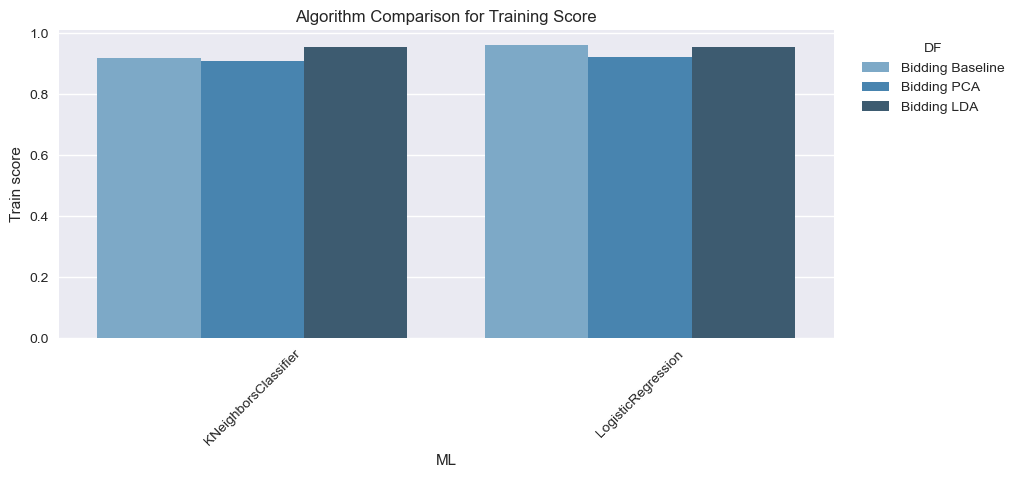

In [516]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn')
plt.xticks(rotation=45)
plt.title('Algorithm Comparison for Training Score')
sns.barplot(data=score_df, x='ML', y='Train score', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**By the training score, we observe that Logistic Regression has the best performance.** 

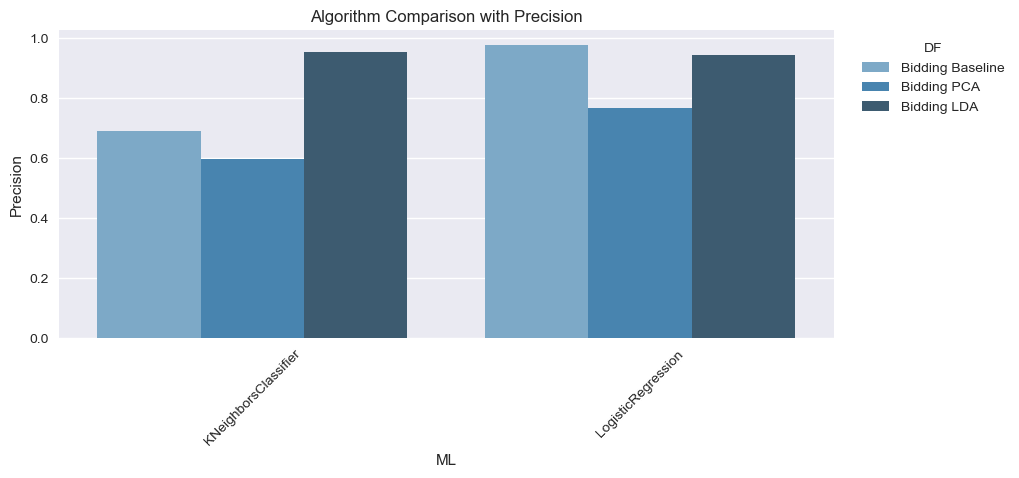

In [518]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison with Precision')
sns.barplot(data=score_df, x='ML', y='Precision', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**The Logistic Regression has the highest score for precision for the Bidding Baseline dataset with a score of 0.9770 instead of the dataset after LDA showing a score of 0.9529. So we have more chances of having a lower number of false positives (not real normal bidding results).**

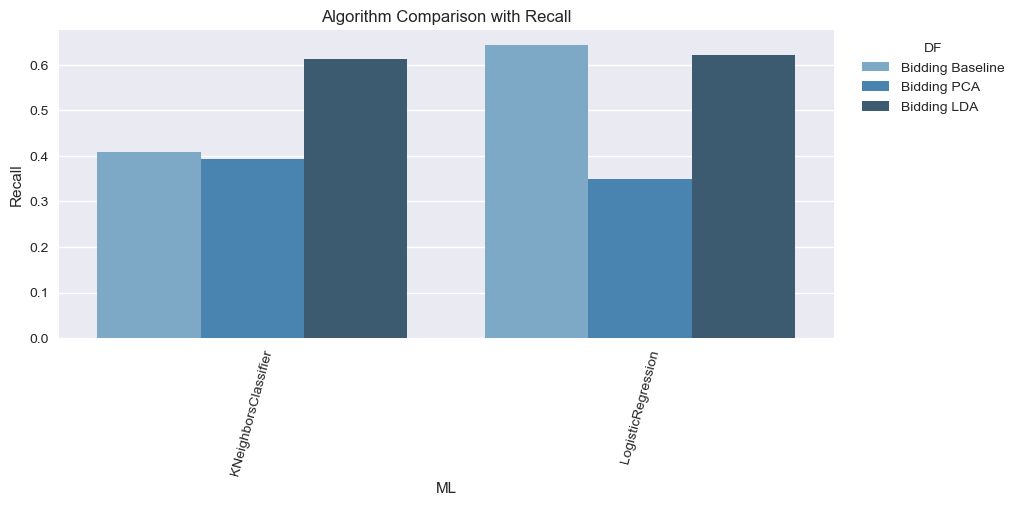

In [519]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with Recall')
sns.barplot(data=score_df, x='ML', y='Recall', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**The Logistic Regression model has the highest score for the baseline dataset with 0.6439. There is more chance of having high numbers of true positives (only true results normal biddings) on a prediction between the training and the test dataset.** 

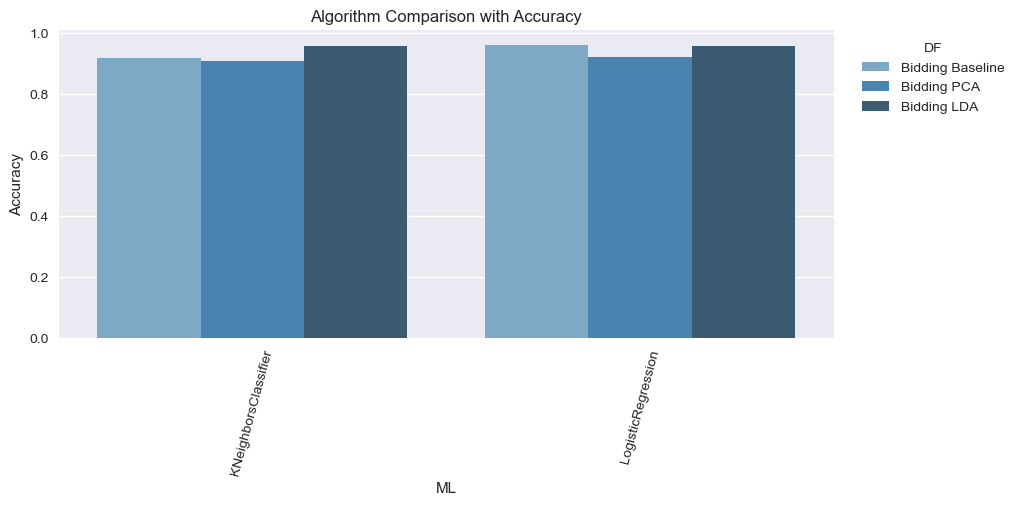

In [520]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with Accuracy')
sns.barplot(data=score_df, x='ML', y='Accuracy', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**The accuracy score is showing the baseline dataset again on the Logistic Regression as the highest with 0.9613 compared with the dataset after LDA with a score of 0.9565.**

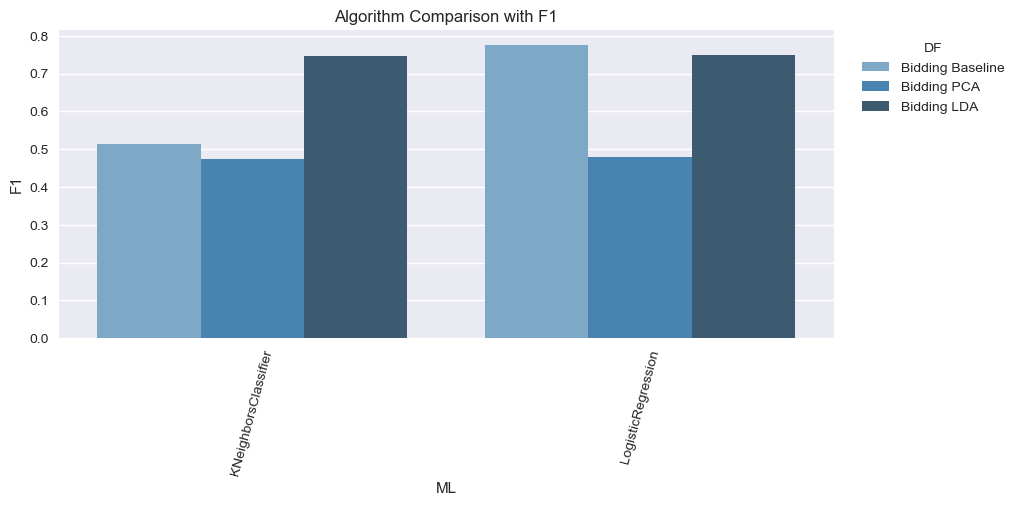

In [521]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with F1')
sns.barplot(data=score_df, x='ML', y='F1', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**After comparing all the scores from Precision, Recall, Accuracy and F1 we can state the Logistic Regression combined with the baseline dataset is the best choice.** \
**Seems the feature reduction affected the performance on most of the metrics for the LDA and PCA dataset. Probably the amount of feature loss in the process generated some data loss relevant to achieve better metrics scores.** \
**As a deduction from the previous statement, we can mention as well the model needed more information to make better predictions.** \
**The next step will be tuning the model's hyperparameters and verifying if we are able to enhance the model predictions.**

## Logistic Regression

In [527]:
print('Number of observations in the dataset:', bidding_df.shape[0])
print('Number of features in the dataset:', bidding_df.shape[1])

Number of observations in the dataset: 6321
Number of features in the dataset: 8


In [523]:
X = bidding_df
y= target

model = linear_model.LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

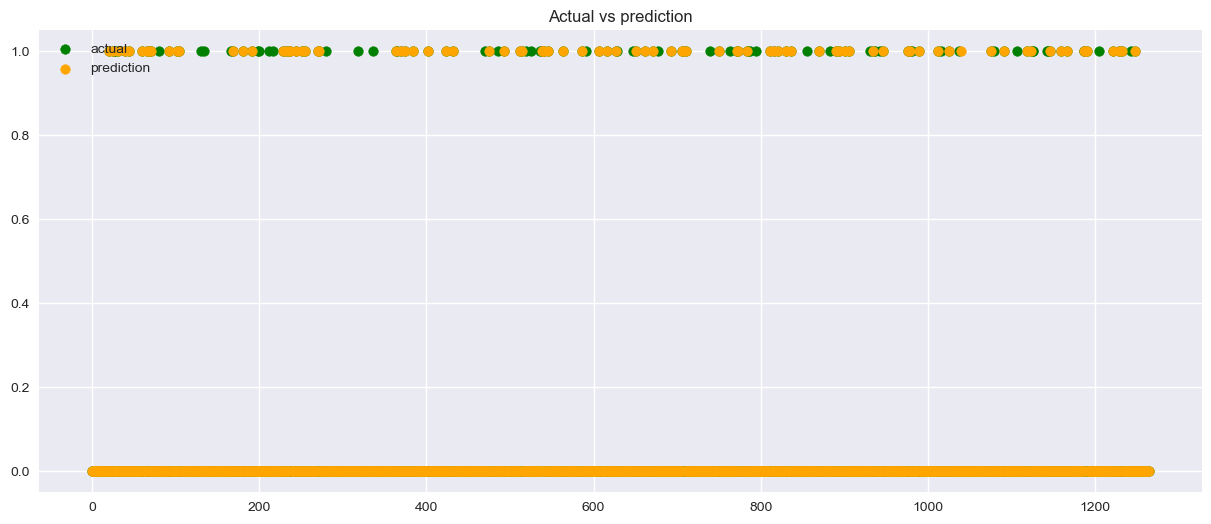

In [525]:
def plotGraph(y_test,y_pred,LogisticRegression): 
    plt.scatter(range(len(y_test)), y_test, color='green', label = 'actual')
    plt.scatter(range(len(y_pred)), y_pred, color='orange', label = 'prediction')
    plt.title(LogisticRegression)
    plt.legend(loc="upper left")
    plt.show()
    return

plt.figure(figsize=(15,6))
plotGraph(y_test, y_pred, "Actual vs prediction")

**As all of the features has 0 or 1 values we can observe that the graph has only 2 possible outcomes for visualisation. We can also understand the value from the trainig dataset to the test dataset are really similar. So the chances to have a good prediction with the model are high.**

### Confusion matrix before tunning hyperparametres

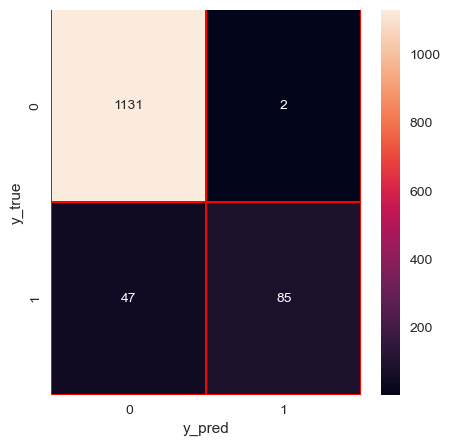

In [526]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**By the confusion matrix performance of the baseline dataset without improving any hyperparameters we can see the true positive as 1131 (prediction on normal biddings) and the true negatives as 85 (prediction on anomalous biddings), we have some really good results. The false positive 47 (the positive results that are showing as negatives, meaning false results of normal biddings) represent 3.71% over a total test dataset of 1265. The number is low so we have a good probability of having an accurate prediction on the model.**

### Applying differents samples with cross-validation

**The ShuffleSplit cross-validation technique is an approach for evaluating machine learning models. ShuffleSplit evaluates any model by training several models on subsets of the input data and evaluating them on the subset of the data. The technique is repeated multiple times, and the average performance of the model is used to get the final score. Along the before, this approach assures that every case of the dataset has the opportunity to be in the training set.**

In [528]:
train_sizes = np.array([0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
train_sizes

array([0.99, 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.5 ])

In [554]:
cv = ShuffleSplit(n_splits=4, random_state=42)

In [560]:
results = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=cv,
    scoring="accuracy", n_jobs=10)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

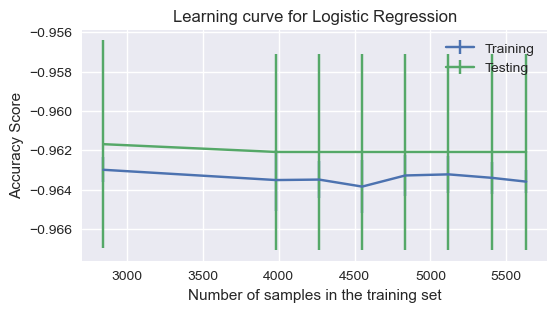

In [563]:
plt.figure(figsize=(6,3))
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy Score")
_ = plt.title("Learning curve for Logistic Regression")

**We have tried the approach by a split of the dataset into 3. By the graph, we can observe the accuracy for the training and test dataset are close. Not yet on the same learning curve so we can understand there could be a slight overfitting of the model. Our next step will be to check the cross-validation and then tune the hyperparameters towards the improvement of the model prediction.**

In [586]:
X=bidding_df
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X2=X_train
y2= y_train

# validation is now 15% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [587]:
print(f'Percentage of each set in the entire datset after spliting: \n The training set is :',int((X_train.shape[0]/bidding_df.shape[0])*100),'% \n'
      'The testing set is:',int((X_test.shape[0]/bidding_df.shape[0])*100),'% \n'
      'The validation is set:',int((X_val.shape[0]/bidding_df.shape[0])*100),'% \n')

Percentage of each set in the entire datset after spliting: 
 The training set is : 80 % 
The testing set is: 10 % 
The validation is set: 9 % 



In [588]:
X=bidding_df
y= target
model = linear_model.LogisticRegression() 

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [590]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [591]:
acc = model.score(X_test, y_test)
print("Accuracy: ", acc*100)

Accuracy:  96.3314358001265


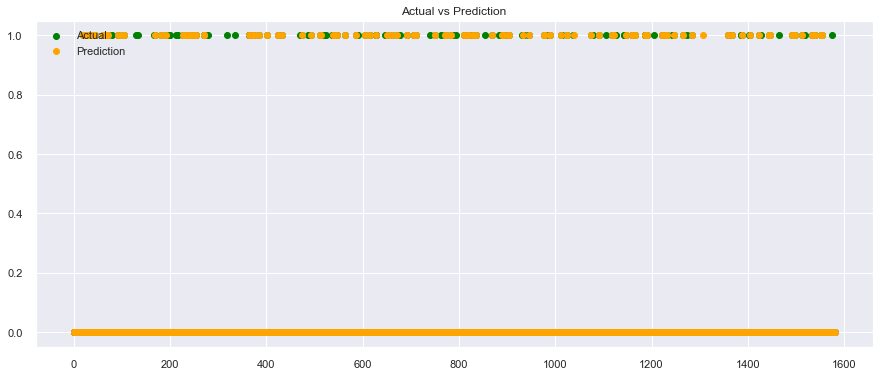

In [585]:
def plotGraph(y_test,y_pred,LogisticRegression):
    plt.figure(figsize=(15,6))
    plt.scatter(range(len(y_test)), y_test, color='green', label = 'Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='orange', label = 'Prediction')
    plt.title(LogisticRegression)
    plt.legend(loc="upper left")
    plt.show()
    return

plotGraph(y_test, y_pred, "Actual vs Prediction")

**The actual model and the prediction have a similar distribution of the data. These results still can be improved. We will define the number of folds we need for cross-validation and analyse the outcomes we obtain.**  

### Defining the K folds

**The StratifiedKFold cross-validation technique is another approach that works by dividing the data among training and test dataset and defining the amount of division by the k-folds. Then training the model on k-1 folds and testing the data on the standing folds. The technique is repeated for k amount of times and each one of the folds is used at least once in the test dataset.**

In [594]:
X=bidding_df
y= target

# test is now 20% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X=X_train
y= y_train

# validation is now 20% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [595]:
# evaluate the model using a given test condition
def evaluate_model(cv):
    scores = - cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=10)
    return scores.mean(), scores.min(), scores.max() 

In [596]:
# define the folds range that we are going to test
folds = range(2,51)

In [598]:
# calculating the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: -0.964


**We will evaluate each value and save the results**

In [599]:
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, random_state=42, shuffle=True)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, Accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, Accuracy=-0.963 (-0.964,-0.962)
> folds=3, Accuracy=-0.964 (-0.966,-0.962)
> folds=4, Accuracy=-0.964 (-0.969,-0.959)
> folds=5, Accuracy=-0.964 (-0.970,-0.956)
> folds=6, Accuracy=-0.964 (-0.972,-0.951)
> folds=7, Accuracy=-0.964 (-0.974,-0.954)
> folds=8, Accuracy=-0.964 (-0.973,-0.956)
> folds=9, Accuracy=-0.964 (-0.977,-0.952)
> folds=10, Accuracy=-0.964 (-0.972,-0.950)
> folds=11, Accuracy=-0.964 (-0.983,-0.946)
> folds=12, Accuracy=-0.964 (-0.976,-0.941)
> folds=13, Accuracy=-0.964 (-0.977,-0.941)
> folds=14, Accuracy=-0.964 (-0.983,-0.950)
> folds=15, Accuracy=-0.964 (-0.979,-0.953)
> folds=16, Accuracy=-0.964 (-0.978,-0.946)
> folds=17, Accuracy=-0.964 (-0.977,-0.943)
> folds=18, Accuracy=-0.964 (-0.989,-0.929)
> folds=19, Accuracy=-0.964 (-0.981,-0.929)
> folds=20, Accuracy=-0.964 (-0.980,-0.929)
> folds=21, Accuracy=-0.964 (-0.988,-0.938)
> folds=22, Accuracy=-0.964 (-0.987,-0.943)
> folds=23, Accuracy=-0.964 (-0.986,-0.932)
> folds=24, Accuracy=-0.964 (-0.981,-0.9

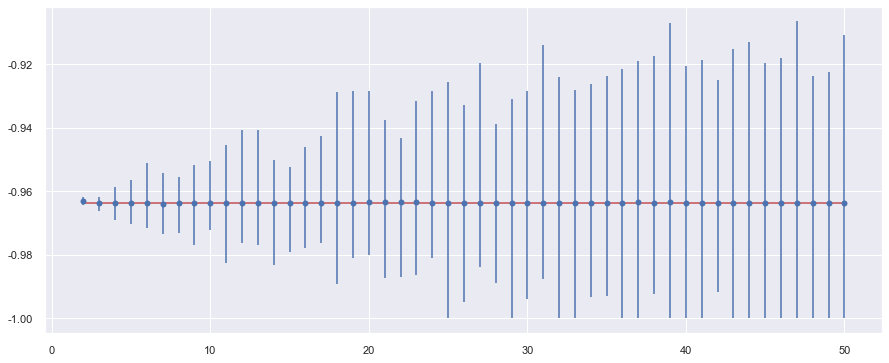

In [613]:
# line plot of k mean values with min/max error bars
plt.figure(figsize=(15,6))
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

**By the graph, the k values are near the optimal results starting at the value of 9 cross-validations of the model. To be sure we can reach the best model efficiency. The next step will be tuning the hyperparameters for the benefit of the model predictions.**

### Tuning the hyperparametres with Pipeline and GridSearchCV 

**Gridsearch is a simple algorithm. It divides the scope of the hyperparameters into a simple grid. Afterwards, tries each one of the possible combinations of values from the grid and lastly calculate performance metrics using cross-validation. We will use it to assist us in our decision of the choice of the hyperparameters.**

In [616]:
X=bidding_df
y= target

# test is now 20% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X=X_train
y= y_train

# validation is now 20% of the new dataframe
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=10, shuffle=False)
model = linear_model.LogisticRegression()

In [617]:
from pprint import pprint
# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [625]:
# Create dictionary with candidate learning algorithms and their hyperparameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(estimator=model, param_grid=grid, cv=cv, verbose=0,n_jobs=10, scoring='accuracy',error_score=0) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [627]:
#print best parameters after tuning
print("Results from Grid Search: " )
print('Best parametres: ', gridsearch.best_params_) 
grid_predictions = gridsearch.predict(X_val)
bestscore = gridsearch.best_score_
print("\n The best score across all searched parameters:",round(bestscore, 2))

Results from Grid Search: 
Best parametres:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

 The best score across all searched parameters: 0.97


**After we applied the GridSearch and tested all the possibilities with the parameters found the best combination of them and reached a score of 97%. We will use these parameters and test them on the model to understand which scores we can reach.**

### Predicting with the hyperparameters

In [662]:
X=bidding_df
y= target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=10, shuffle=False)

model = linear_model.LogisticRegression( C=0.1, penalty= 'l2', solver= 'liblinear')

Training accuracy: 0.9636075949367089
Testing accuracy: 0.9612648221343874


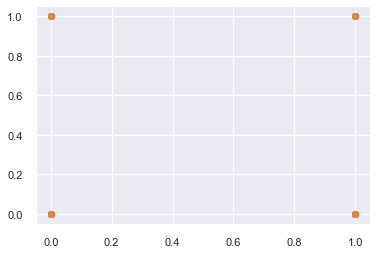

In [664]:
model.fit(X_train, y_train)

print("Training accuracy:",model.score(X_train, y_train)) 
print("Testing accuracy:",model.score(X_test, y_test))
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

plt.scatter(y_train,y_pred_train);
plt.scatter(y_train,y_pred_train);

**Observing the graph is displaying all the values from the biddings between the training and testing datasets that have a normal distribution with high accuracy.**

In [673]:
print('Train Data Score:', round(model.score(X_train, y_train),4))
print('Test Data Score:', round(model.score(X_test, y_test),4))

Train Data Score: 0.9636
Test Data Score: 0.9613


In [677]:
print('Improvement of {:0.2f}%.'.format(100 * (model.score(X_train, y_train) - 0.9633) / 0.9633))

Improvement of 0.03%.


**We have reached an improvement on the score of 0.03%. Probably this would be the best performance we would get from this model. We will go by the same process with the KNeighbors Classifier model with the LDA dataset which was the second model with preliminary good results to make a comparison of models.**

## KNeighbors Classifier

In [679]:
print('Number of observations in the dataset:', X_lda.shape[0])
print('Number of features in the dataset:', X_lda.shape[1])

Number of observations in the dataset: 6321
Number of features in the dataset: 1


In [680]:
X = X_lda
y= target

model = KNeighborsClassifier() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

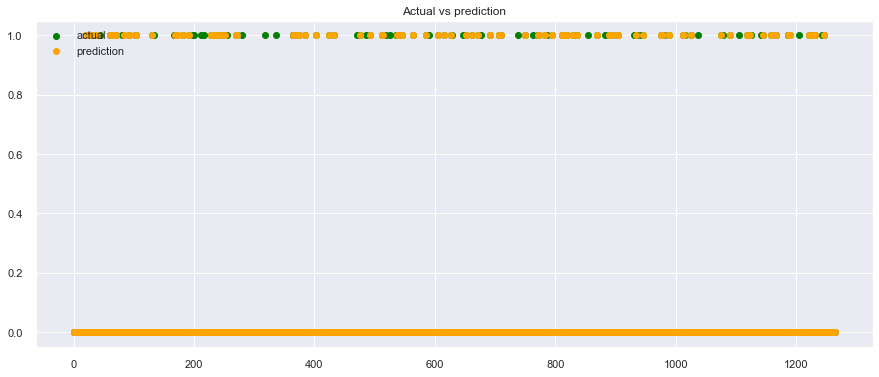

In [683]:
def plotGraph(y_test,y_pred,KNeighborsClassifier): 
    plt.scatter(range(len(y_test)), y_test, color='green', label = 'actual')
    plt.scatter(range(len(y_pred)), y_pred, color='orange', label = 'prediction')
    plt.title(KNeighborsClassifier)
    plt.legend(loc="upper left")
    plt.show()
    return

plt.figure(figsize=(15,6))
plotGraph(y_test, y_pred, "Actual vs prediction")

**A similar distribution of values as with the previous model. The values from the training dataset to the test dataset are really similar. The same analysis applies to, we have a high chance to have a good prediction with the model. Let's try to understand with more analysis if the model performs better compared to Logistic Regression.**

### Confusion matrix before tunning hyperparametres

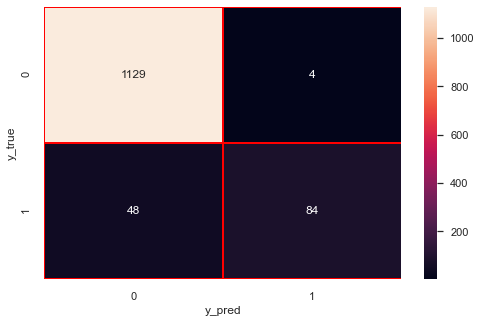

In [685]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (8,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**By the confusion matrix performance of the baseline dataset without improving any hyperparameters we can see the true positive as 1129 (prediction on normal biddings) and the true negatives as 84 (prediction on anomalous biddings), we have some really good results. The false positive 48 (the positive results that are showing as negatives, meaning false results of normal biddings) represent 3.79% over a total test dataset of 1265. The number is low so we have a good probability of having an accurate prediction on the model.**

### Applying differents samples with cross-validation

In [686]:
train_sizes = np.array([0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
train_sizes

array([0.99, 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.5 ])

In [728]:
cv = ShuffleSplit(n_splits=40, random_state=42)

In [729]:
results = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=cv,
    scoring="accuracy", n_jobs=10)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

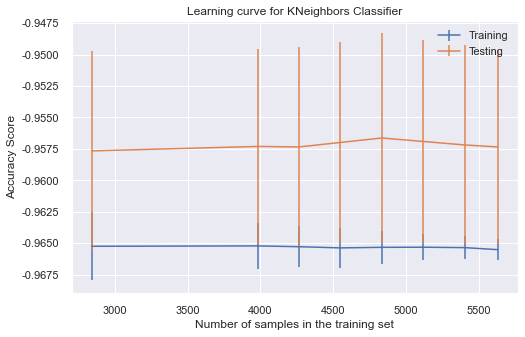

In [730]:
plt.figure(figsize=(8,5))
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy Score")
_ = plt.title("Learning curve for KNeighbors Classifier")

**We tried splitting into 40 until we reached the best accuracy results. By the graph, we can observe the accuracy between the training and the test dataset is not as close as it could be. The testing is performing better than the training so we could interpret the model as overfitting. Let's move to the cross-validation scores and see how it performs.**

In [731]:
X=X_lda
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X2=X_train
y2= y_train

# validation is now 15% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [732]:
print(f'Percentage of each set in the entire datset after spliting: \n The training set is :',int((X_train.shape[0]/X_lda.shape[0])*100),'% \n'
      'The testing set is:',int((X_test.shape[0]/bidding_df.shape[0])*100),'% \n'
      'The validation is set:',int((X_val.shape[0]/X_lda.shape[0])*100),'% \n')

Percentage of each set in the entire datset after spliting: 
 The training set is : 63 % 
The testing set is: 20 % 
The validation is set: 16 % 



In [733]:
X=X_lda
y= target
model = KNeighborsClassifier() 

In [734]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [735]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [736]:
acc = model.score(X_test, y_test)
print("Accuracy: ", acc*100)

Accuracy:  96.07843137254902


**The model accuracy is high but as we have stated before we should try to improve the overfitting to achieve better predictions.**

### Defining the K folds

In [738]:
X=X_lda
y= target

# test is now 20% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X=X_train
y= y_train

# validation is now 20% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [739]:
# evaluate the model using a given test condition
def evaluate_model(cv):
    scores = - cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=10)
    return scores.mean(), scores.min(), scores.max() 

In [740]:
# calculating the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: -0.959


In [741]:
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, random_state=42, shuffle=True)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, Accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, Accuracy=-0.960 (-0.963,-0.956)
> folds=3, Accuracy=-0.957 (-0.960,-0.954)
> folds=4, Accuracy=-0.959 (-0.969,-0.950)
> folds=5, Accuracy=-0.958 (-0.971,-0.946)
> folds=6, Accuracy=-0.959 (-0.967,-0.947)
> folds=7, Accuracy=-0.959 (-0.971,-0.947)
> folds=8, Accuracy=-0.960 (-0.975,-0.953)
> folds=9, Accuracy=-0.959 (-0.977,-0.941)
> folds=10, Accuracy=-0.960 (-0.972,-0.945)
> folds=11, Accuracy=-0.959 (-0.980,-0.941)
> folds=12, Accuracy=-0.960 (-0.976,-0.938)
> folds=13, Accuracy=-0.960 (-0.974,-0.933)
> folds=14, Accuracy=-0.959 (-0.983,-0.942)
> folds=15, Accuracy=-0.959 (-0.979,-0.947)
> folds=16, Accuracy=-0.960 (-0.978,-0.943)
> folds=17, Accuracy=-0.959 (-0.977,-0.939)
> folds=18, Accuracy=-0.960 (-0.993,-0.925)
> folds=19, Accuracy=-0.960 (-0.985,-0.929)
> folds=20, Accuracy=-0.960 (-0.980,-0.929)
> folds=21, Accuracy=-0.960 (-0.983,-0.938)
> folds=22, Accuracy=-0.959 (-0.991,-0.939)
> folds=23, Accuracy=-0.959 (-0.986,-0.932)
> folds=24, Accuracy=-0.960 (-0.981,-0.9

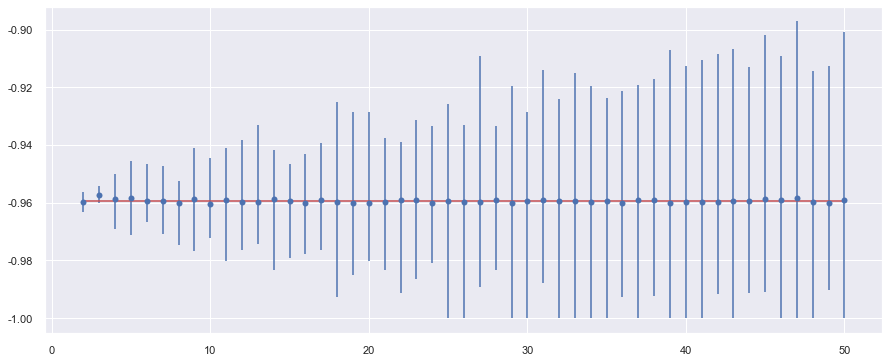

In [742]:
# line plot of k mean values with min/max error bars
plt.figure(figsize=(15,6))
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

**By the graph, the k values are trying to adjust to the optimal results in all of the foldings but we can identify by the fold value of 17 cross-validations of the model it starts to improve. The next step is hyperparameter tuning.**

### Tuning the hyperparametres with Pipeline and GridSearchCV

In [747]:
X=X_lda
y= target

# test is now 20% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X=X_train
y= y_train

# validation is now 20% of the new dataframe
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=17, shuffle=False)
model = KNeighborsClassifier()

In [748]:
from pprint import pprint
# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [749]:
# Create dictionary with candidate learning algorithms and their hyperparameters
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = dict(n_neighbors=k_range)
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', return_train_score=False,verbose=1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 17 folds for each of 30 candidates, totalling 510 fits


In [750]:
#print best parameters after tuning
print("Results from Grid Search: " )
print('Best parametres: ', gridsearch.best_params_) 
grid_predictions = gridsearch.predict(X_val)
bestscore = gridsearch.best_score_
print("\n The best score across all searched parameters:",round(bestscore, 2))

Results from Grid Search: 
Best parametres:  {'n_neighbors': 4}

 The best score across all searched parameters: 0.97


**After we applied the GridSearch and tested all the possibilities with the parameters found the best combination of them and reached a score of 97%. We will use these parameters and test them on the model to understand which scores we can reach.**

### Predicting with the hyperparameters

In [765]:
X=X_lda
y= target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=17, shuffle=False)

model = KNeighborsClassifier( n_neighbors= 4 )

Training accuracy: 0.9667721518987342
Testing accuracy: 0.958102766798419


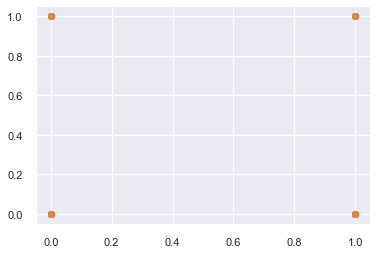

In [754]:
model.fit(X_train, y_train)

print("Training accuracy:",model.score(X_train, y_train)) 
print("Testing accuracy:",model.score(X_test, y_test))
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

plt.scatter(y_train,y_pred_train);
plt.scatter(y_train,y_pred_train);

**Observing the graph displays all the values from the biddings between the training and testing datasets that have a normal distribution with high accuracy.**

In [766]:
cv = ShuffleSplit(n_splits=30, random_state=42)

In [767]:
results = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=cv,
    scoring="accuracy", n_jobs=10)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

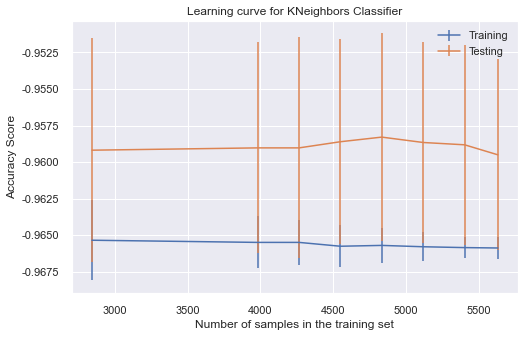

In [768]:
plt.figure(figsize=(8,5))
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy Score")
_ = plt.title("Learning curve for KNeighbors Classifier")

In [755]:
print('Train Data Score:', round(model.score(X_train, y_train),4))
print('Test Data Score:', round(model.score(X_test, y_test),4))

Train Data Score: 0.9668
Test Data Score: 0.9581


In [758]:
print('Improvement of {:0.2f}%.'.format(100 * (model.score(X_train, y_train) - 0.9607) / 0.9607))

Improvement of 0.63%.


**The improvement is good for the model but not sufficient. As we can observe in the previous graph the learning curve has not enhanced to attain the same testing accuracy as on the training set. We can deduce that the model is still overfitting.**

### Data Visualisation for Final Algorithm Comparison 

In [816]:
score_df = pd.DataFrame(columns= ['DF', 'ML','Parametres','Train score', 'Accuracy', 'Precision','Recall','F1','Cross Validation'], data=None)
score_df.head()

,DF,ML,Parametres,Train score,Accuracy,Precision,Recall,F1,Cross Validation


In [817]:
def ml_model (model, X):
    X_train, X_test, y_train, y_test = train_test_split(X2,target, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    train_scr = round(model.score(X_test, y_test), 4)
    accuracy_scr = round(accuracy_score(y_test, y_pred),4)
    recall_scr = round(recall_score(y_test, y_pred),4)
    precision_scr = round(precision_score(y_test, y_pred),4)
    f1_scr = round(f1_score(y_test, y_pred),4)
   
    global score_df
    score_df =score_df.append({'DF':X.name,
                               'Parametres': parametres,
                               'ML':type(model).__name__,
                               'Train score':train_scr,
                               'Accuracy':accuracy_scr,
                               'Precision':precision_scr,
                               'Recall':recall_scr,
                               'Cross Validation':cv,
                               'F1':f1_scr},
                              ignore_index=True)
    return (score_df)

In [818]:
X2 = X_lda
y2 = target
cv=KFold(n_splits=17, shuffle=False)

In [819]:
model = KNeighborsClassifier(n_neighbors=4)
X=X2
X2.name = "Bidding LDA"
parametres = ("n_neighbors=4")

ml_model(model, X)

,DF,ML,Parametres,Train score,Accuracy,Precision,Recall,F1,Cross Validation
0,Bidding LDA,KNeighborsClassifier,n_neighbors=4,0.9581,0.9581,0.954,0.6288,0.758,"KFold(n_splits=17, random_state=None, shuffle=..."


In [820]:
X2 = bidding_df
y2 = target
cv=KFold(n_splits=10, shuffle=False)

In [821]:
model = linear_model.LogisticRegression( C=0.1, penalty= 'l2', solver= 'liblinear')
X=X2
X2.name = "Bidding Baseline"
parametres = ("C=0.1, penalty= 'l2', solver= 'liblinear'")

ml_model(model, X)

,DF,ML,Parametres,Train score,Accuracy,Precision,Recall,F1,Cross Validation
0,Bidding LDA,KNeighborsClassifier,n_neighbors=4,0.9581,0.9581,0.954,0.6288,0.7580,"KFold(n_splits=17, random_state=None, shuffle=..."
1,Bidding Baseline,LogisticRegression,"C=0.1, penalty= 'l2', solver= 'liblinear'",0.9597,0.9597,0.988,0.6212,0.7628,"KFold(n_splits=10, random_state=None, shuffle=..."


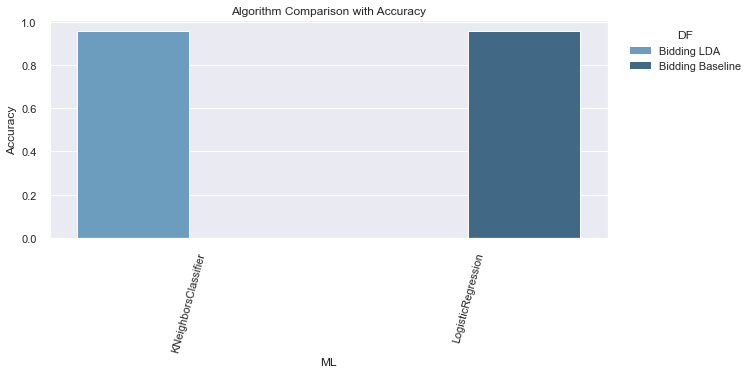

In [822]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with Accuracy')
sns.barplot(data=score_df, x='ML', y='Accuracy', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**We can observe for both model after tuning the hyperparameters they are achieving a high accuracy very similar between both of them.**

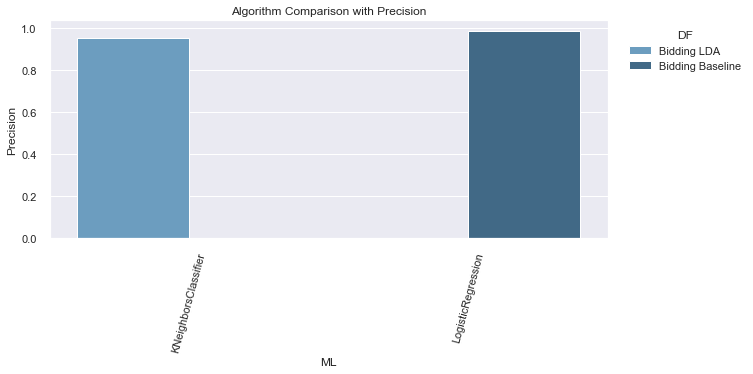

In [823]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with Precision')
sns.barplot(data=score_df, x='ML', y='Precision', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**For Precision the Logistic Regression is performing better on the Bidding Baseline dataset than the KNeighborsClassifier on the Bidding LDA. This implies having a lower number of false positives (not real normal bidding results).**

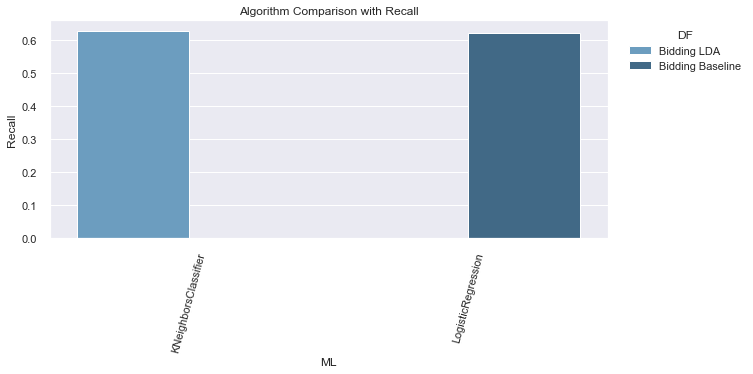

In [824]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with Recall')
sns.barplot(data=score_df, x='ML', y='Recall', palette='Blues_d', hue='DF')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title='DF')

plt.show()

**For the Recall, the KNeighborsClassifier model is performing slightly better. Implying there is more chance of having high numbers of true positives (only true results normal biddings) for this model.**

## Conclusion 

 **The Logistic Regression is the optimal model for this dataset with an outcome of 95.81% after we have improved the hyperparameters accomplished to a model that is not overfitting. In comparison with the KNeighborsClassifier for the LDA, the dataset overall has a greater accuracy value (95.97%) but it is overfitting and probably will not get good predictions for new sets of data as there is greater possibility it is learning from the training set. It is clear that is not a good option for the needed model predictions and we should choose the Logistic Regression model.**

## References

. Serpa, Ygor (2020), Towards Data Science. Available at: https://towardsdatascience.com/memory-efficient-data-science-types-53423d48ba1d (Accessed: 22/12/2022).

. Senavirathne, N., Torra, V. (2019), Springer Nature Switzerland AG. Available at: https://doi.org/10.1007/s12652-019-01489-7 (Accessed: 22/12/2022).

. Kumar, Ajitesh (2022), Data Analytics, Vitalflux.com. Available at: https://vitalflux.com/python-improve-model-performance-using-feature-scaling/ (Accessed: 29/12/2022).

. Francesco Palumbo et al., Antony Unwinet et al. (2008) Handbook of Data Visualization, Leipzig, Germany: Springer-Verlag Berlin Heidelberg.

. Arbel, Iftach ("n.d." note: stands for no date), Bigabid. Available at: https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/ (Accessed: 08/01/2023).

. Kumar Dash, Sunil (2021), Analytics Vidhya. Available at: https://towardsdatascience.com/memory-efficient-data-science-types-53423d48ba1d (Accessed: 08/01/2023).

. Kumar, Ajitesh (2022), Data Analytics, Vitalflux.com. Available at: https://vitalflux.com/k-fold-cross-validation-python-example/ (Accessed: 10/01/2023).

. Abhigyan (2021), Geek Culture. Available at: https://medium.com/geekculture/cross-validation-techniques-33d389897878  (Accessed: 10/01/2023).